In [2]:
import numpy as np 
import matplotlib.pyplot as plt
#import wxmplot.interactive as wi
from xraydb import mu_elam, atomic_symbol, get_materials, material_mu, get_material
from scipy.optimize import fsolve

In [3]:
def calculate_attenuation(material, energy, lower_limit, upper_limit):
    """
    Calculate the transmitted fraction of X-rays through a material.

    Parameters:
    material (str): The material through which the X-rays are passing.
    energy (float): The energy of the X-rays in eV.
    lower_limit (float): The lower limit of the thickness range in cm.
    upper_limit (float): The upper limit of the thickness range in cm.

    Returns:
    tuple: A tuple containing the thickness vector and the transmitted fraction vector.
    """
    depths = np.linspace(lower_limit, upper_limit, 500)  # depths in cm
    mu = material_mu(material, [energy])[0]  # mu is returned in 1/cm
    transmitted_fraction = np.exp(-mu * depths)
    return depths, transmitted_fraction


In [4]:
def plot_multiple_materials(materials, energy, lower_limit, upper_limit):
    """
    Plot the X-ray attenuation for multiple materials.

    Parameters:
    materials (list of str): List of materials to plot.
    energy (float): The energy of the X-rays in eV.
    lower_limit (float): The lower limit of the thickness range in cm.
    upper_limit (float): The upper limit of the thickness range in cm.
    """
    plt.figure(figsize=(10, 6))
    thick50nm = 50 * 1e-7
    
    for material in materials:
        depths, transmitted_fraction = calculate_attenuation(material, energy, lower_limit, upper_limit)
        plt.plot(depths * 1e4, transmitted_fraction, label=material, linewidth=2)
        idx_50nm = np.argmin(np.abs(depths - thick50nm))
        attenuation50nm = transmitted_fraction[idx_50nm]
        print(f"Material: {material}, Attenuation at 50nm: {attenuation50nm:.4e}")
    
    # Add vertical line at 50 nm
    plt.axvline(x=50/1000, color='k', linestyle='--', linewidth=1, label='50 nm')
    
    plt.title(f'X-ray Attenuation at {energy / 1000:.1f} keV')
    plt.xlabel('Thickness (microns)')
    plt.ylabel('Transmitted Fraction')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def find_thickness_for_attenuation(material, energy, target_attenuation):
    """
    Find the thickness of a material needed to achieve a specified attenuation for a given X-ray energy.

    Parameters:
    material (str): The material through which the X-rays are passing.
    energy (float): The energy of the X-rays in eV.
    target_attenuation (float): The desired attenuation fraction (transmitted fraction).

    Returns:
    float: The thickness in cm required to achieve the target attenuation.
    """
    # Define the function representing the equation mu * thickness = -ln(target_attenuation)
    def equation(thickness, mu, target_attenuation):
        return np.exp(-mu * thickness) - target_attenuation

    mu = material_mu(material, [energy])[0]  # mu is returned in 1/cm
    initial_guess = 0.0001  # Initial guess for thickness in cm

    # Use fsolve to find the root of the equation
    thickness_solution, = fsolve(equation, initial_guess, args=(mu, target_attenuation))
    
    return thickness_solution

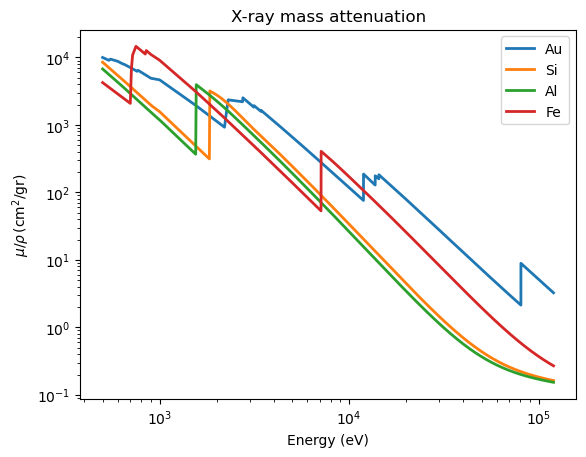

In [6]:
#attenuation
energy = np.arange(500, 120000, 10)  # energy in eV
      
for elem in ('Au', 'Si', 'Al', 'Fe'):
    mu = mu_elam(elem, energy)
    plt.plot(energy, mu, label=elem, linewidth=2)
 
plt.title('X-ray mass attenuation')
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\mu/\rho \rm\, (cm^2/gr)$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

Material: Si, Attenuation at 50nm: 9.9618e-01
Material: Au, Attenuation at 50nm: 9.2025e-01
Material: Si3N4, Attenuation at 50nm: 9.9660e-01
Material: kapton, Attenuation at 50nm: 9.9975e-01


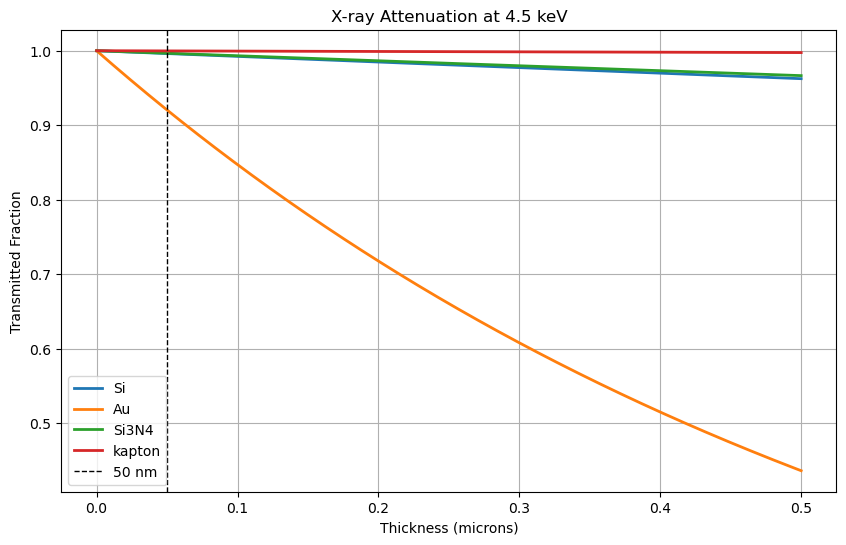

In [7]:
# Example usage:
materials = ['Si', 'Au', 'Si3N4', 'kapton']
plot_multiple_materials(materials, 4500, 0, 0.00005)

Material: kapton, Attenuation at 50nm: 1.0000e+00
Material: polypropylene, Attenuation at 50nm: 1.0000e+00
Material: teflon, Attenuation at 50nm: 1.0000e+00


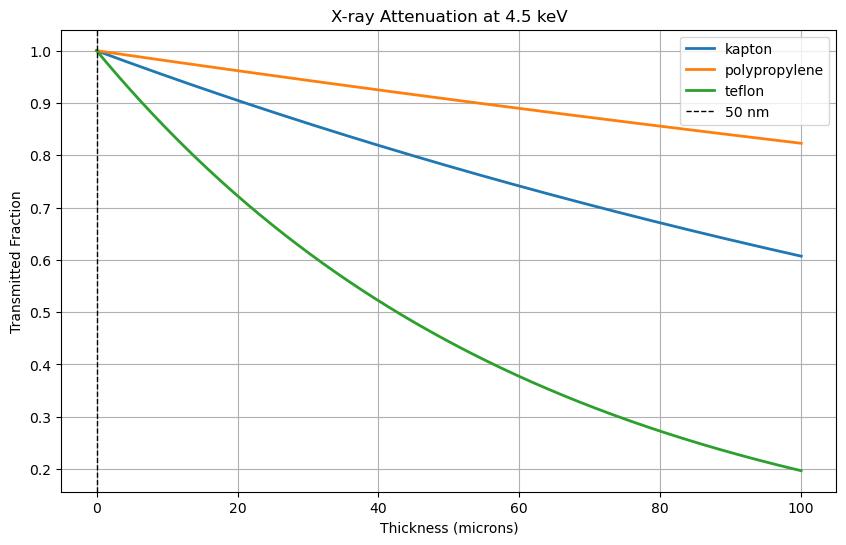

In [8]:
# Example usage:
materials = ['kapton', 'polypropylene', 'teflon']
plot_multiple_materials(materials, 4500, 0, 0.01)

In [9]:
#get material
for name, m in get_materials().items():
     print(name, m)

hydrogen Material(formula='H', density=8.99e-05, name='hydrogen', categories=['gas', 'element'])
helium Material(formula='He', density=0.0001786, name='helium', categories=['gas', 'element'])
nitrogen Material(formula='N', density=0.00125, name='nitrogen', categories=['gas', 'element'])
oxygen Material(formula='O', density=0.001429, name='oxygen', categories=['gas', 'element'])
neon Material(formula='Ne', density=0.0009002, name='neon', categories=['gas', 'element'])
argon Material(formula='Ar', density=0.001784, name='argon', categories=['gas', 'element'])
krypton Material(formula='Kr', density=0.003749, name='krypton', categories=['gas', 'element'])
xenon Material(formula='Xe', density=0.005894, name='xenon', categories=['gas', 'element'])
air Material(formula='(N2)0.7808(O2)0.2095Ar9.34e-3(CO2)4.1e-4Ne1.82e-5He5.24e-6(CH4)1.8e-6Kr1.0e-6(H2)0.5e-6Xe9.e-8', density=0.001225, name='air', categories=['gas'])
methane Material(formula='CH4', density=0.000657, name='methane', categories=['

In [10]:
# Example usage:
material = 'Si'
energy = 4500  # in eV
target_transmission = 0.916734645  # Desired attenuation fraction (90% attenuation)

thickness = find_thickness_for_attenuation(material, energy, target_transmission)
print(f'Thickness required for {material} to achieve {target_transmission*100:.1f}% transmission at {energy} eV: {thickness*1e4:.2f} microns')

Thickness required for Si to achieve 91.7% transmission at 4500 eV: 1.14 microns
